# <center>CUSTOMER CHURN PREDICTION</center>

### Content
<br>Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

<b>The data set includes information about:</b>

Customers who left within the last month – the column is called Churn<br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
Demographic info about customers – gender, age range, and if they have partners and dependents
<hr><b>Inspiration</b><br>
To explore this type of models and learn more about the subject.

#### 1. Import required libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

#### 2. Load our data

In [2]:
data = pd.read_csv('customer_churn_prediction.csv')

#### 3.Data exploration

Peek first 5 records in our data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Get number of records and feature

In [4]:
print("We have ",data.shape[0]," records and ",data.shape[1]," features ")

We have  7043  records and  21  features 


List the dataset variables

In [5]:
list(data.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Group by Churn

In [6]:
data.groupby(['Churn'])['Churn'].count()

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# pct of attrition // (No/Yes)*100 
len(data[data['Churn']=='Yes'])/len(data[data['Churn']=='No']) * 100

36.122922303826826

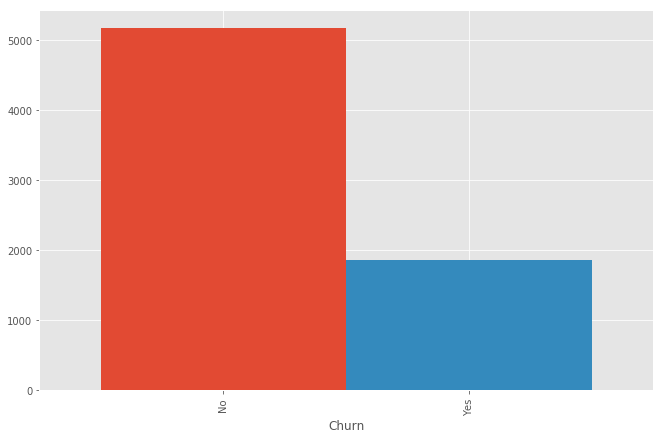

In [8]:
data.groupby(['Churn'])['Churn'].count().plot.bar(width=1,figsize=(11, 7))

Group by Gender

In [9]:
data.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

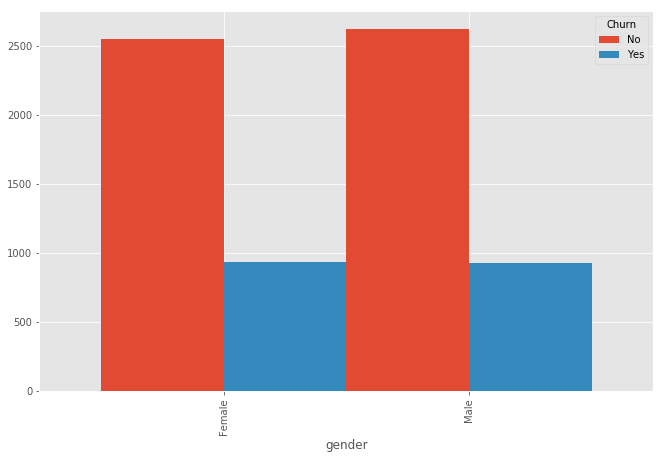

In [10]:
data.groupby(['gender','Churn'])['Churn'].count().unstack().plot.bar(width=1,figsize=(11, 7))

Group by Partner

In [11]:
data.groupby(['Partner','Churn'])['Churn'].count()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

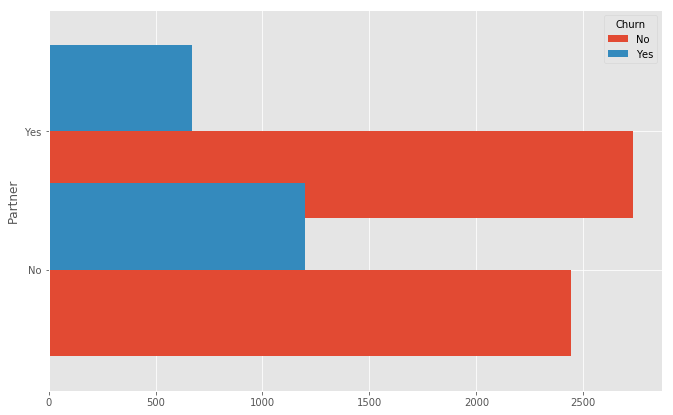

In [12]:
data.groupby(['Partner','Churn'])['Churn'].count().unstack().plot.barh(width=1.25,figsize=(11, 7))

Group by Contract

In [13]:
data.groupby(['Contract','Churn'])['Churn'].count()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

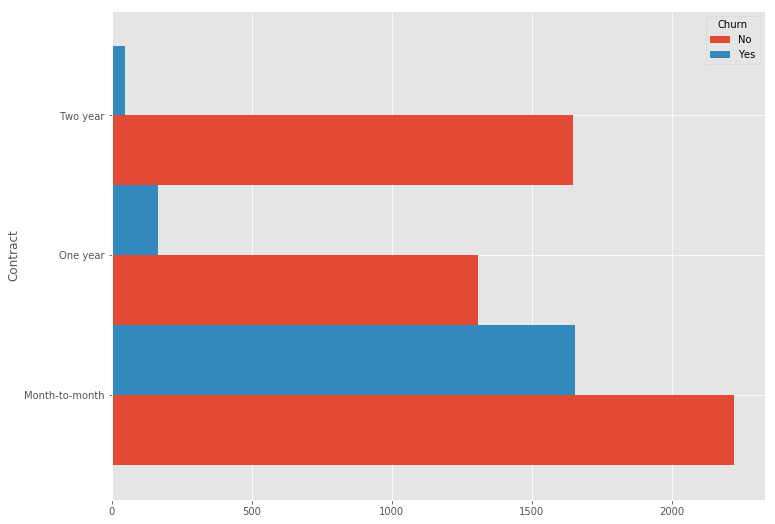

In [14]:
data.groupby(['Contract','Churn'])['Churn'].count().unstack().plot.barh(width=1,figsize=(11.7, 9))

Group by PhoneService

In [15]:
data.groupby(['PhoneService','Churn'])['Churn'].count()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

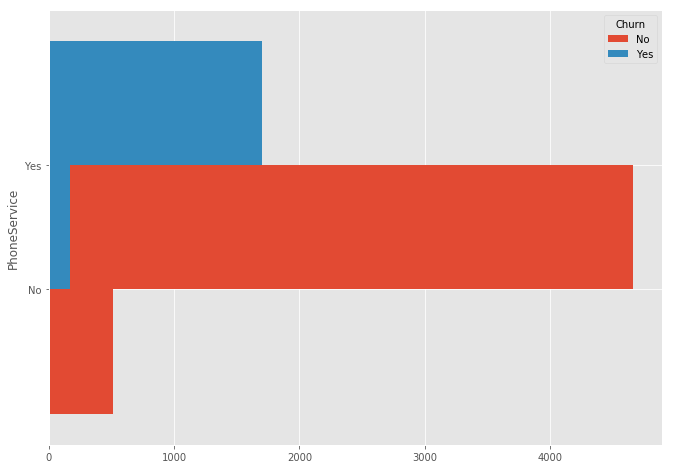

In [16]:
data.groupby(['PhoneService','Churn'])['Churn'].count().unstack().plot.barh(width=2,figsize=(11, 8))

Group by TechSupport

In [17]:
data.groupby(['TechSupport','Churn'])['Churn'].count()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

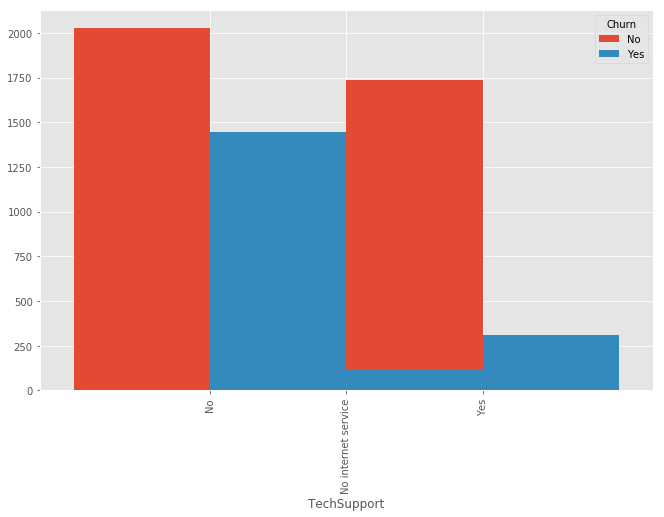

In [18]:
data.groupby(['TechSupport','Churn'])['Churn'].count().unstack().plot.bar(width=2,figsize=(11, 7))

Group by SeniorCitizen

In [19]:
data.groupby(['SeniorCitizen','Churn'])['Churn'].count()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

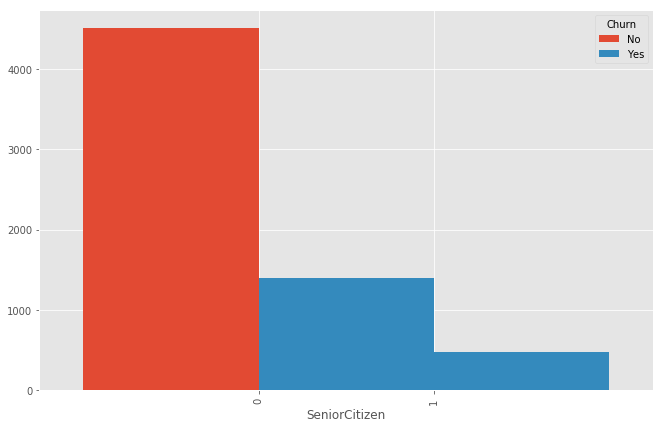

In [20]:
data.groupby(['SeniorCitizen','Churn'])['Churn'].count().unstack().plot.bar(width=2,figsize=(11, 7))

#### 4. Data Preprocessing

Handle Missing Values

Identify Missing values

In [21]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check data types

In [22]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Convert numeric features to number type from Object type

In [23]:
data=data.apply(lambda col: pd.factorize(col)[0])

In [24]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,3,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1


In [25]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
X=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

### 5. Get Features and target/label

In [27]:
features=data[['gender', 'SeniorCitizen', 'Partner','tenure', 'PhoneService', 
               'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport','Contract', 'PaperlessBilling',
               'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

target=data['Churn']

Scaling our features

In [28]:
features=MinMaxScaler().fit_transform(features)
target=data['Churn'].values
target=np_utils.to_categorical(target)

#### 6. Splitting our data into training and testing set

In [29]:
X_train, X_test, y_train, y_test=train_test_split(features,target, test_size=0.3,random_state=7)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 16), (2113, 16), (4930, 2), (2113, 2))

#### 7. Create our Machine Learning Model

In [31]:
model=Sequential()
model.add(Dense(units=8,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=len(data['Churn'].unique()), activation='softmax'))

In [32]:
# Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fit model
history=model.fit(X_train,y_train, batch_size=64, epochs=100,validation_split=0.3)

Train on 3451 samples, validate on 1479 samples
Epoch 1/100
3451/3451 [==============================] - 1s 212us/step - loss: 0.6868 - acc: 0.6865 - val_loss: 0.6716 - val_acc: 0.7289
Epoch 2/100
3451/3451 [==============================] - 0s 29us/step - loss: 0.6606 - acc: 0.7357 - val_loss: 0.6509 - val_acc: 0.7377
Epoch 3/100
3451/3451 [==============================] - 0s 41us/step - loss: 0.6421 - acc: 0.7424 - val_loss: 0.6339 - val_acc: 0.7404
Epoch 4/100
3451/3451 [==============================] - 0s 42us/step - loss: 0.6269 - acc: 0.7407 - val_loss: 0.6206 - val_acc: 0.7397
Epoch 5/100
3451/3451 [==============================] - 0s 42us/step - loss: 0.6146 - acc: 0.7409 - val_loss: 0.6098 - val_acc: 0.7397
Epoch 6/100
3451/3451 [==============================] - 0s 41us/step - loss: 0.6044 - acc: 0.7409 - val_loss: 0.6010 - val_acc: 0.7404
Epoch 7/100
3451/3451 [==============================] - 0s 41us/step - loss: 0.5949 - acc: 0.7407 - val_loss: 0.5924 - val_acc: 0.7404

3451/3451 [==============================] - 0s 42us/step - loss: 0.4232 - acc: 0.8015 - val_loss: 0.4403 - val_acc: 0.7897
Epoch 61/100
3451/3451 [==============================] - 0s 47us/step - loss: 0.4233 - acc: 0.8001 - val_loss: 0.4403 - val_acc: 0.7884
Epoch 62/100
3451/3451 [==============================] - 0s 40us/step - loss: 0.4240 - acc: 0.7986 - val_loss: 0.4426 - val_acc: 0.7748
Epoch 63/100
3451/3451 [==============================] - 0s 34us/step - loss: 0.4240 - acc: 0.8027 - val_loss: 0.4426 - val_acc: 0.7762
Epoch 64/100
3451/3451 [==============================] - 0s 41us/step - loss: 0.4223 - acc: 0.8024 - val_loss: 0.4398 - val_acc: 0.7863
Epoch 65/100
3451/3451 [==============================] - 0s 40us/step - loss: 0.4216 - acc: 0.8035 - val_loss: 0.4416 - val_acc: 0.7836
Epoch 66/100
3451/3451 [==============================] - 0s 41us/step - loss: 0.4212 - acc: 0.7992 - val_loss: 0.4413 - val_acc: 0.7803
Epoch 67/100
3451/3451 [==============================

#### 8. Evaluate our model

In [34]:
print("Accuracy : ",model.evaluate(X_test,y_test)[1])

2113/2113 [==============================] - 0s 25us/step
Accuracy :  0.7846663511594889


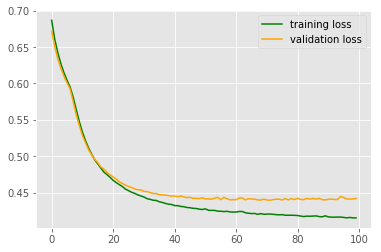

In [35]:
plt.plot(history.history['loss'],color='green',label='training loss')
plt.plot(history.history['val_loss'],color='orange',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [36]:
prediction=model.predict(X_test)
prediction[0:10]

array([[0.65385675, 0.3461433 ],
       [0.52963734, 0.47036266],
       [0.52915615, 0.47084388],
       [0.66240126, 0.3375987 ],
       [0.8185778 , 0.18142216],
       [0.9274181 , 0.07258185],
       [0.4553172 , 0.5446828 ],
       [0.30329177, 0.6967082 ],
       [0.79726845, 0.20273153],
       [0.32617217, 0.6738278 ]], dtype=float32)

### 9. Observations
1. Approximately 36.12% of customers are prone to churning
2. Gender does not influence the rate of attrition. 
3. Customers who are not partners are more likely to churn leave than those who are partners.
4. Customers with short-term contract like (Month-to-Month) are more likely to churn that those with long-tern contract.
5. Clients without customer service support are 5 times more likely to leave the service than those that have tech support service.
6. Senior citizens are 3 times less likely to churn the service than other citizens.


### 10. Recommendations on Handling the customer churn problem
1. Improve the quality of service.
2. Strive to convert customers who are not partners to become partners.
3. Focus on making your customers have a long-term contract.
4. Provide support to all customers.
5. Engage with the customers likely to churn. Look at their profile, identify characteristics and analyse past interactions 
with your product and then simply talk to them. Ask for feedback, communicate latest developments that might be from interest or educate them on new product features. Approach customers likely to churn, but make sure that you come up with relevant things that may fit their individual needs. It will create a feeling of being understood and bind them to you and your business.

### 11. Model Improvement
To improve our model below are important tips;
1. Collect more information / features that describe user behaviour.
2. Perform hyperparameter tunning.
3. Use advanced algorithms such as neural network.